# Imports and Pathnames

In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Data pathnames
data_path = [
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Main Library Pre-processed.xlsx', # Main Library (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Student Centre Pre-processed.xlsx', # Student Centre (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Science Library Pre-processed.xlsx', # Science Library (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Main Library Pre-processed.xlsx', # Main Library (Term 2)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Student Centre Pre-processed.xlsx', # Student Centre (Term 2)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Science Library Pre-processed.xlsx', # Science Library (Term 2)
    ]

# Define Neural Network

In [2]:
class Net(nn.Module):
    # Define the neural network architecture
    def __init__(self, nb_layers=9, nb_nodes=4):
        super().__init__()
        # Define the layers
        self.linear_layers = nn.ModuleList()
        for i in range(nb_layers):
            if i == 0: # first layer
                self.linear_layers.append(nn.Linear(5, nb_nodes))
            elif i == nb_layers - 1: # last layer
                self.linear_layers.append(nn.Linear(nb_nodes, 1))
            else: # hidden layers
                self.linear_layers.append(nn.Linear(nb_nodes, nb_nodes))
                
        self.initialise_weights()

    # Define the forward pass
    def forward(self, x):
        # Every layer has a ReLU activation function, even the output layer
        for layer in self.linear_layers:
            x = nn.ReLU()(layer(x))
        return x
    
    def initialise_weights(self):
        # Initialise the weights of the neural network
        for layer in self.linear_layers:
            nn.init.xavier_normal_(layer.weight.data) # Xavier Glorot initialisation
            nn.init.constant_(layer.bias.data, 0)
    
    

# Pre-Training Functions

In [4]:
# Import pre-training functions
import os
print(os.getcwd())

from Functions import preprocess_data, train_test_split, t1_train_t2_test

/Users/kyhi2018/Desktop/IndividualProject/GitHub Code/Machine Learning Code (Predictive)/NN Additional Exploration


ModuleNotFoundError: No module named 'Functions'

# Train Network Function

In [ ]:
# Train the network
def train_net(model, x_train, y_train, optimiser = 'Adam', lr = 0.2, loss_func = 'MSE', steps = 1000):
    
    print(model)  # net architecture

    # Define optimizer and loss function
    if optimiser == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimiser == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif optimiser == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=lr)
        
    if loss_func == 'MSE':
        loss_func = nn.MSELoss() # this is for regression mean squared loss

    old_loss = 0      # initialise old loss
    current_step = 0  # initialise step counter
    
    while current_step < steps:
        prediction = model(x_train)     # use x_train tp predict y_train
        
        new_loss = loss_func(prediction.squeeze(), y_train) # compute loss
        
        if current_step % (steps//5) == 0: # print loss every 20% of training
            print(new_loss.item())
            
        if old_loss == new_loss: # stop training and reinitialise weights if loss is not changing
            
            print('Loss is not changing. Reinitialising weights...')
            print(f'Final loss: {new_loss.item()}', f'Final step: {current_step}')
            
            model.initialise_weights()
            current_step = 0 # reset training process
            continue
        else:
            old_loss = new_loss.clone() # update old loss

            optimizer.zero_grad()   # clear gradients for next train
            new_loss.backward()     # backpropagation, compute gradients
            optimizer.step()        # apply gradients
        
        current_step += 1 # update step
        
    print(f'Optimser: {optimiser}', f'learning rate: {lr}', f'Loss function: {loss_func}')
    
    return model, new_loss

# Main

Net(
  (linear_layers): ModuleList(
    (0): Linear(in_features=5, out_features=4, bias=True)
    (1-7): 7 x Linear(in_features=4, out_features=4, bias=True)
    (8): Linear(in_features=4, out_features=1, bias=True)
  )
)
45874.203125
5564.7900390625
5616.50244140625
5523.85302734375
Loss is not changing. Reinitialising weights...
Final loss: 5523.2255859375 Final step: 1275
45873.01953125
Loss is not changing. Reinitialising weights...
Final loss: 28202.47265625 Final step: 129
45874.234375
Loss is not changing. Reinitialising weights...
Final loss: 45874.234375 Final step: 1
45874.07421875
Loss is not changing. Reinitialising weights...
Final loss: 28202.34765625 Final step: 159
45874.234375
2546.26318359375
2159.981201171875
2183.220947265625
2043.16015625
Optimser: Adam learning rate: 0.1 Loss function: MSELoss()
Final train loss:  1815.5709228515625
Testing data:  tensor([[0.3287, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3357, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3427, 0

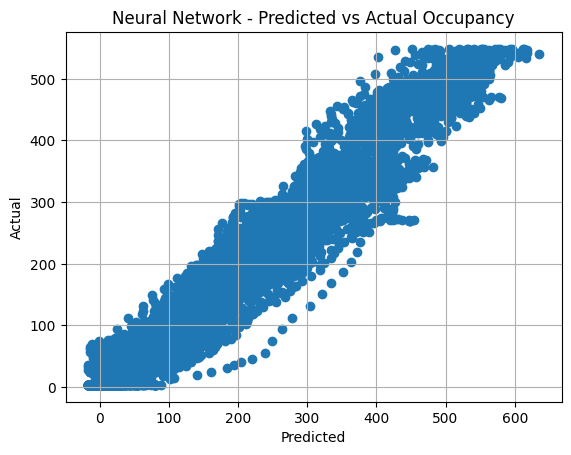

Finished


In [ ]:
if __name__ == '__main__':
    # Initialize the network
    model = Net()
    
    # Import data
    t1_data = pd.read_excel(data_path[0])
    t2_data = pd.read_excel(data_path[3])
        
    # Preprocess data
    t1_data = preprocess_data(t1_data)
    t2_data = preprocess_data(t2_data)
    
    # Split data into training and testing sets
    #x_train, x_test, y_train, y_test = train_test_split(t1_data, train_end=(11,11))
    x_train, x_test, y_train, y_test = t1_train_t2_test(t1_data, t2_data)


    # Train the network
    model, loss = train_net(model, x_train, y_train, optimiser='Adam', lr=0.1, loss_func='MSE', steps=2000)
    print('Final train loss: ', loss.item())
    
    # Predict the target variable on the testing data
    model.eval()
    print('Testing data: ', x_test)
    prediction = model(x_test)
    print('Prediction: ', prediction.squeeze())
    
    # Compute the loss on the testing data
    loss = nn.MSELoss()
    test_loss = loss(prediction.squeeze(), y_test)
    print('Test loss: ', test_loss.item())
    
    # Plot the results
    prediction = prediction.detach().numpy()
    y_test = y_test.detach().numpy()
    plt.scatter(y_test, prediction)
    plt.title('Neural Network - Predicted vs Actual Occupancy')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()
    
    
    
    print('Finished')